<a href="https://colab.research.google.com/github/chandhinipj/CartPole-V0-ReinforcementLearning/blob/main/PredictionChallenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton Code for Prediction Challenge 3
Below is partial code to get you started on prediction challenge 3. You need to select values for the parameters that have question marks.

In [5]:
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [8]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent

In [9]:
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))

model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 5000 steps ...
   13/5000: episode: 1, duration: 0.108s, episode steps:  13, steps per second: 121, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.231 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   32/5000: episode: 2, duration: 0.014s, episode steps:  19, steps per second: 1314, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.632 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   62/5000: episode: 3, duration: 0.023s, episode steps:  30, steps per second: 1290, episode reward: 30.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   75/5000: episode: 4, duration: 0.010s, episode steps:  13, steps per second: 1248, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.231 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  105/5000: episode: 5, duration: 0.677s, episode steps:  30, steps per second:  44, episode reward: 30.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.567 [0.000, 1.000],  loss: 4.679460, mae: 7.114057, mean_q: 12.681247, mean_eps: 0.981550
  150/5000: episode: 6, duration: 0.312s, episode steps:  45, steps per second: 144, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.600 [0.000, 1.000],  loss: 2.325196, mae: 7.079136, mean_q: 13.504586, mean_eps: 0.977140
  160/5000: episode: 7, duration: 0.069s, episode steps:  10, steps per second: 146, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 3.250010, mae: 7.265631, mean_q: 13.841727, mean_eps: 0.972190
  182/5000: episode: 8, duration: 0.151s, episode steps:  22, steps per second: 146, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 3.389078, mae: 7.240316, mean_q: 13.519675, mean_eps: 0

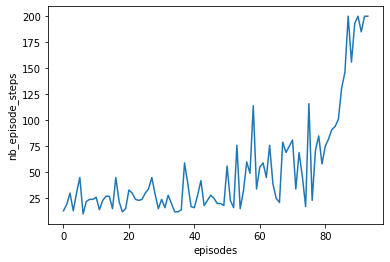

In [12]:
memory = SequentialMemory(limit=5000, window_length=1)

# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(eps=0.2), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=5000)


# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=5000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

In [14]:
dqn.test(env, nb_episodes=20, visualize=False)

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 193.000, steps: 193
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 168.000, steps: 168
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 193.000, steps: 193
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 183.000, steps: 183
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 188.000, steps: 188
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 194.000, steps: 194
Episode 20: reward: 200.000, steps: 200
